<a href="https://colab.research.google.com/github/Kartik-0911/Tree-Species-Project/blob/main/tree_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Kartik-0911/Tree-Species-Project


Cloning into 'Tree-Species-Project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 1.81 MiB | 6.87 MiB/s, done.


In [3]:
!ls Tree-Species-Project


README.md  tree_CNN.ipynb


In [4]:
%cd Tree-Species-Project


/content/Tree-Species-Project


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Tree Sepecies Classification.zip to Tree Sepecies Classification.zip


In [6]:
import zipfile

with zipfile.ZipFile("Tree Sepecies Classification.zip", 'r') as zip_ref:
    zip_ref.extractall("Tree_Species_Dataset")


In [7]:
import os

print("Contents of Tree_Species_Dataset:", os.listdir("Tree_Species_Dataset"))


Contents of Tree_Species_Dataset: ['Tree Sepecies Classification']


In [8]:
import os

repo_path = "Tree_Species_Dataset"  # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))


Contents: ['Tree Sepecies Classification']


In [9]:
repo_path = "Tree_Species_Dataset/Tree Sepecies Classification"
print("Contents:", os.listdir(repo_path))


Contents: ['Tree_Species_Dataset']


In [12]:
import os

print("Level 1:", os.listdir("Tree_Species_Dataset"))
print("Level 2:", os.listdir("Tree_Species_Dataset/Tree Sepecies Classification"))
print("Level 3:", os.listdir("Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset"))


Level 1: ['Tree Sepecies Classification']
Level 2: ['Tree_Species_Dataset']
Level 3: ['shirish', 'khajur', 'coconut', 'vad', 'cactus', 'jamun', 'gulmohor', 'bamboo', 'kesudo', 'saptaparni', 'bili', 'mango', 'amla', 'gunda', 'neem', 'motichanoti', 'simlo', 'nilgiri', '.git', 'other', 'babul', 'sitafal', 'asopalav', 'champa', 'garmalo', 'pilikaren', 'sugarcane', 'pipal', 'banyan', 'kanchan', 'sonmahor']


In [13]:
repo_path = "Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset"
print("Contents:", os.listdir(repo_path))


Contents: ['shirish', 'khajur', 'coconut', 'vad', 'cactus', 'jamun', 'gulmohor', 'bamboo', 'kesudo', 'saptaparni', 'bili', 'mango', 'amla', 'gunda', 'neem', 'motichanoti', 'simlo', 'nilgiri', '.git', 'other', 'babul', 'sitafal', 'asopalav', 'champa', 'garmalo', 'pilikaren', 'sugarcane', 'pipal', 'banyan', 'kanchan', 'sonmahor']


In [14]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 31


In [15]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1605


In [20]:
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)


         Image Count
other            150
khajur            50
shirish           50
vad               50
cactus            50
shape:  (31, 1)


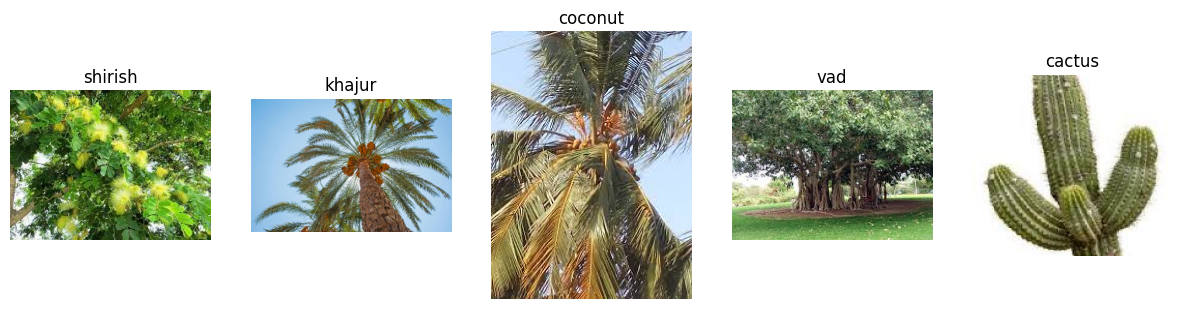

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)


In [22]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(repo_path, class_dir, img_file)
            try:
                img = Image.open(img_path)
                image_shapes.append(img.size)
            except:
                print(f"Skipping unreadable image: {img_path}")

# DataFrame and Summary
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()


,Width,Height
0,259,194
1,204,247
2,275,183
3,309,163
4,194,259


In [23]:
print(shapes_df.describe())


             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [24]:
import hashlib
from collections import defaultdict

valid_extensions = ('.jpg', '.jpeg', '.png')

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if img_file.lower().endswith(valid_extensions):
            try:
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)
            except Exception as e:
                print(f"⚠️ Skipping unreadable file: {img_path} — {e}")

# Find duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔍 Duplicate image sets found:", len(duplicates))

# Optional: print some duplicate groups
for i, (h, files) in enumerate(duplicates.items()):
    print(f"\nDuplicate Group {i + 1}:")
    for file in files:
        print(file)
    if i == 2:  # Only show first 3 sets
        break


🔍 Duplicate image sets found: 82

Duplicate Group 1:
Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/shirish/download (1).jpeg
Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/shirish/download (4).jpeg

Duplicate Group 2:
Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/coconut/download (3).jpg
Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/coconut/download (1).jpg

Duplicate Group 3:
Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/vad/download (15).jpeg
Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/vad/download (4).jpeg


In [25]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))


Corrupted images: 5


Duplicate set 1:


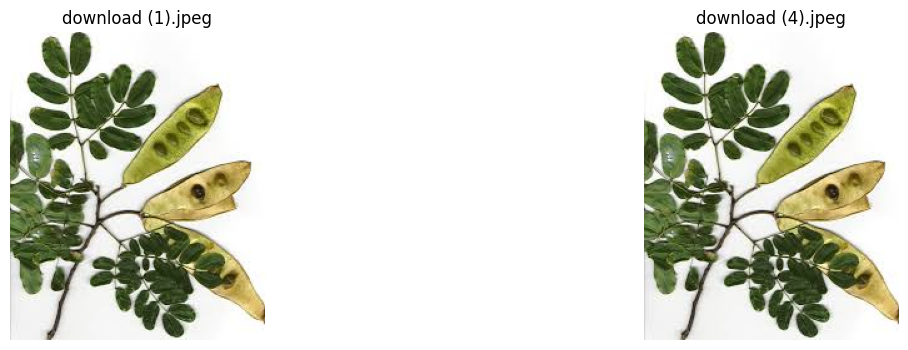

Duplicate set 2:


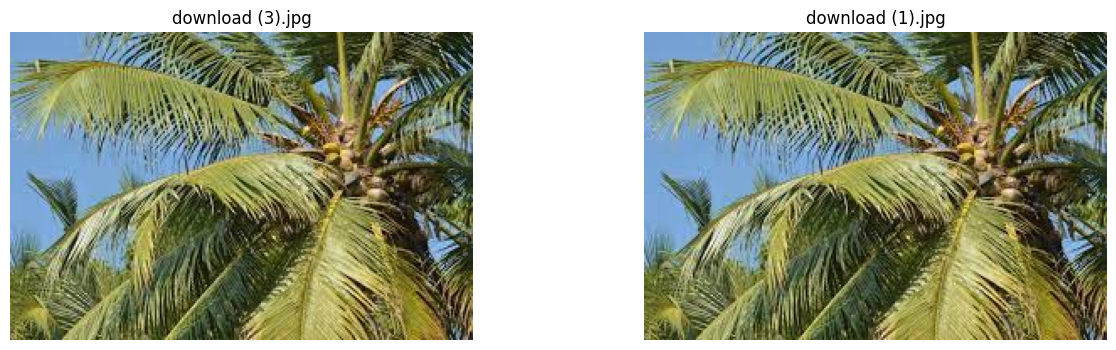

Duplicate set 3:


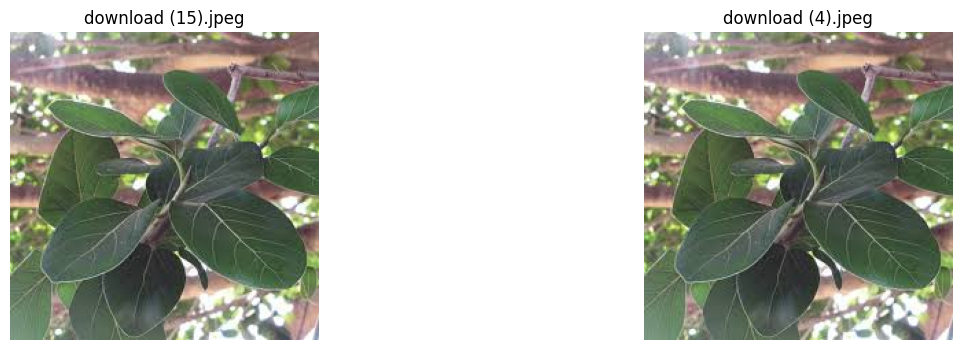

In [26]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)


In [27]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")


✅ Removed 86 duplicate images.


In [28]:
from collections import defaultdict
import hashlib
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if os.path.isfile(img_path):  # ✅ Skip directories
            try:
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)
            except Exception as e:
                print(f"⚠️ Error reading {img_path}: {e}")

# Check again for duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [29]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")


🔻 Very small images: 20
🔺 Very large images: 40


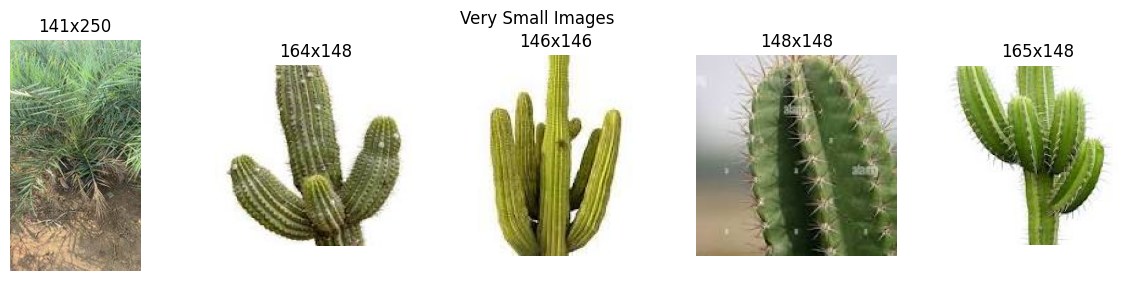

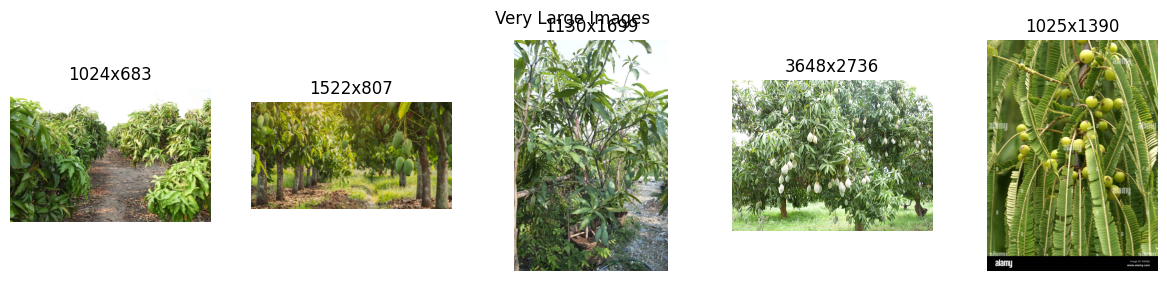

In [30]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")


In [31]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")


🗑️ Removed 60 outlier images (small + large).


In [32]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())


             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [34]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [35]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.0526 - loss: 3.4758 - val_accuracy: 0.0903 - val_loss: 3.3964
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.0712 - loss: 3.4205 - val_accuracy: 0.0903 - val_loss: 3.3855
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.0725 - loss: 3.4247 - val_accuracy: 0.0903 - val_loss: 3.3829
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.0934 - loss: 3.4027 - val_accuracy: 0.0903 - val_loss: 3.3959
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.0784 - loss: 3.4002 - val_accuracy: 0.0903 - val_loss: 3.3806
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.0819 - loss: 3.4041 - val_accuracy: 0.0903 - val_loss: 3.3776
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.0817 - loss: 3.3999 - val_accuracy: 0.0903 - val_loss: 3.3726
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.0675 - loss: 3.4240 - val_accuracy: 0.0903 - v

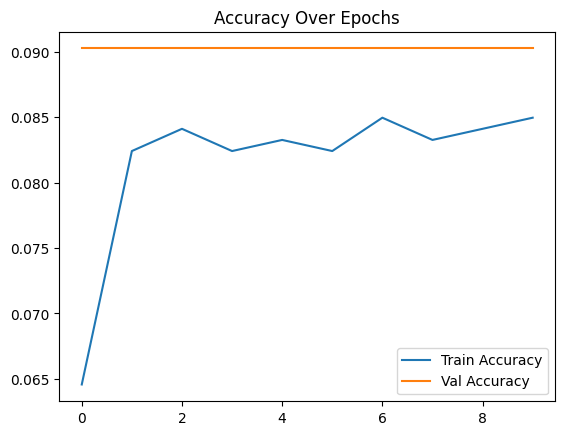

In [36]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")


Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 185s 5s/step - accuracy: 0.0718 - loss: 3.9232 - val_accuracy: 0.0903 - val_loss: 3.3692
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - accuracy: 0.0989 - loss: 3.3244 - val_accuracy: 0.1011 - val_loss: 3.1152
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 171s 5s/step - accuracy: 0.1181 - loss: 3.1784 - val_accuracy: 0.1877 - val_loss: 2.9753
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 184s 5s/step - accuracy: 0.1668 - loss: 3.0194 - val_accuracy: 0.2058 - val_loss: 2.8707
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 172s 5s/step - accuracy: 0.1535 - loss: 2.9657 - val_accuracy: 0.1949 - val_loss: 2.7936
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 170s 5s/step - accuracy: 0.1754 - loss: 2.8944 - val_accuracy: 0.2419 - val_loss: 2.6847
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 211s 5s/step - accuracy: 0.2013 - loss: 2.7591 - val_accuracy: 0.2419 - val_loss: 2.6665
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 172s 5s/step - accuracy: 0.2069 - loss: 2.7099 - val_accuracy: 0.2455 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


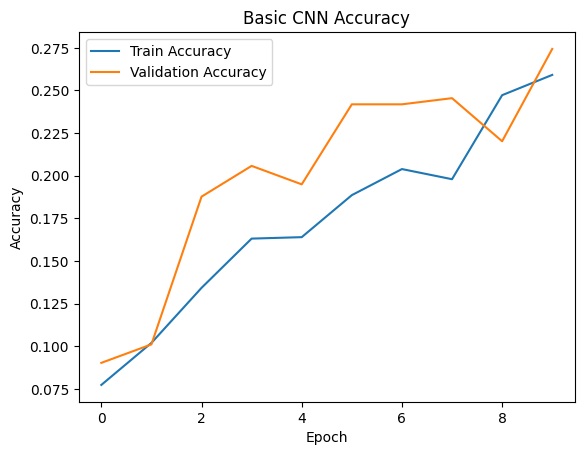

In [38]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [46]:
Dense(31, activation='softmax')  # ✅ Correct


<Dense name=dense_9, built=False>

In [47]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [48]:
print(train_generator.num_classes)


31


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax')  # ✅ MATCHED
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [50]:
model.fit(train_generator, validation_data=val_generator, epochs=25)


Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 265s 7s/step - accuracy: 0.0740 - loss: 5.2165 - val_accuracy: 0.0000e+00 - val_loss: 6.9709
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 256s 7s/step - accuracy: 0.1242 - loss: 3.2110 - val_accuracy: 0.0181 - val_loss: 11.1431
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 256s 7s/step - accuracy: 0.1418 - loss: 3.1980 - val_accuracy: 0.0289 - val_loss: 13.3687
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 255s 7s/step - accuracy: 0.1399 - loss: 3.1380 - val_accuracy: 0.0397 - val_loss: 13.2836
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 258s 7s/step - accuracy: 0.1449 - loss: 3.0951 - val_accuracy: 0.0325 - val_loss: 13.9724
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 254s 7s/step - accuracy: 0.1566 - loss: 3.1180 - val_accuracy: 0.0758 - val_loss: 12.8059
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 255s 7s/step - accuracy: 0.1485 - loss: 3.0732 - val_accuracy: 0.0614 - val_loss: 12.2206
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 269s 7s/step - accuracy: 0.1573 - loss: 3.0584 - val_accuracy: 

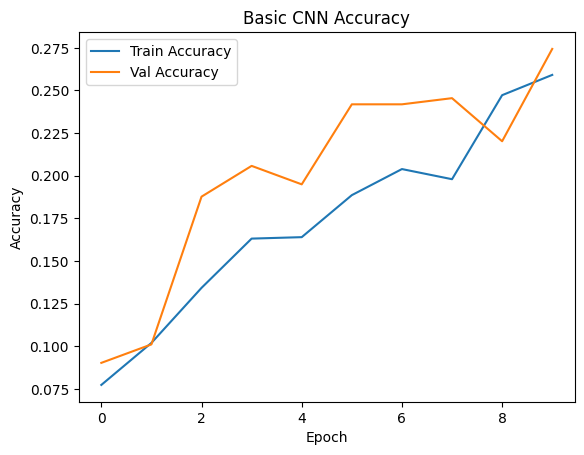

In [51]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [53]:
%cd /content/Tree-Species-Project


/content/Tree-Species-Project


In [55]:
!ls


 basic_cnn_tree_species.h5  'Tree Sepecies Classification.zip'
 README.md		     Tree_Species_Dataset
 tree_CNN.ipynb		     tree_species_model.h5


In [56]:
!git add .

!git commit -m "📦 Final submission: Added tree_CNN notebook and basic CNN model"

!git status


Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@114d99fb2655.(none)')
On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   Tree Sepecies Classification.zip
	new file:   Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/1.jpg
	new file:   Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/2.jpg
	new file:   Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/3.jpeg
	new file:   Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/6.jpg
	new file:   Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/7.jpg
	new

In [57]:
!git config --global user.email "avinashrk2107@gmail.com"
!git config --global user.name "Kartik-0911"


In [58]:
!git commit -m "📦 Final submission: Added tree_CNN notebook and basic CNN model"


[main cd9dcbc] 📦 Final submission: Added tree_CNN notebook and basic CNN model
 1457 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Tree Sepecies Classification.zip
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/1.jpg
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/2.jpg
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/3.jpeg
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/6.jpg
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/7.jpg
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/download (1).jpeg
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_Species_Dataset/amla/download (2).jpeg
 create mode 100644 Tree_Species_Dataset/Tree Sepecies Classification/Tree_S